<a href="https://colab.research.google.com/github/The1AndOnlyAlex/PyTorch-MNIST/blob/main/pytorch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=3c98107f1d852f3bfdcfb6252bae8556954c61465d179722cbdc26c99892c049
  Stored in directory: /root/.cache/pip/wheels/f7/48/00/ae031c97d62f39e1c3c4daa00426c09a65eb29ae5753a189ee
Successfully built idx2numpy


https://www.kaggle.com/datasets/hojjatk/mnist-dataset

In [13]:
uploaded = files.upload()
uploaded2 = files.upload()

Saving train-images.idx3-ubyte to train-images (1).idx3-ubyte


Saving train-labels.idx1-ubyte to train-labels.idx1-ubyte


In [19]:
import idx2numpy

filenameImages = 'train-images.idx3-ubyte'
images = idx2numpy.convert_from_file(filenameImages)
filenameLabels = 'train-labels.idx1-ubyte'
labels = idx2numpy.convert_from_file(filenameLabels)

print(images.shape)   # This should show (60000, 28, 28) for MNIST
print(labels.shape)

(60000, 28, 28)
(60000,)


**Data is ready to be brought in as PyTorch tensor now**

In [21]:
x = torch.from_numpy(images.copy()) # copy() so that it is writable. Otherwise will recieve warning
y = torch.from_numpy(labels.copy())

In [24]:
x.shape

torch.Size([60000, 28, 28])

In [27]:
y.shape

torch.Size([60000])

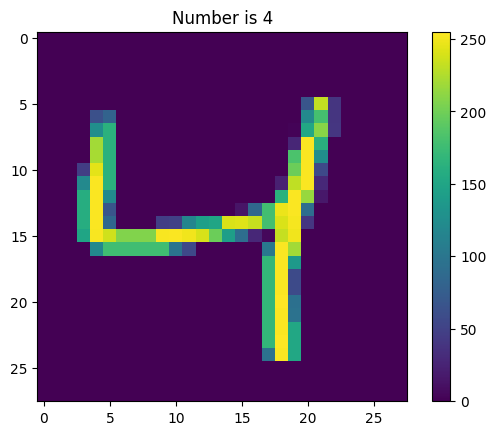

In [26]:
plt.imshow(x[2].numpy())
plt.title(f'Number is {y[2].numpy()}')
plt.colorbar()
plt.show()

# **The One Hot Encoder**

In [28]:
y_original = torch.tensor([2, 4, 3, 0, 1])
y_new = F.one_hot(y_original)

In [29]:
y_original

tensor([2, 4, 3, 0, 1])

In [30]:
y_new

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])

Now doing this on the entire dataset:

In [32]:
y_new = F.one_hot(y.long(), num_classes=10)
# PyTorch requires integer index tensors for indexing
# ops—always as torch.int64 which is why y.long() is needed
y_new

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]])

# **Issues with the Images**

In [33]:
x.shape

torch.Size([60000, 28, 28])

The images are currently 28x28, but we want to turn the images into a vector (which will be length $28^2 = 784). We can do this using the .view property of a tensor. So we are effectively "squishing" all 60000 images of 28x28 into a single vector of length 784.

In [36]:
# -1 here means keep the first dimension of x (60000 images)
x.view(-1,28**2).shape

torch.Size([60000, 784])

# **PyTorch Dataset Object**

In [38]:
#class CTDataset(Dataset):
#  def __init__(self)

In [ ]:
# NOTE: you have to make your CTDataset obejct a little
# differently because you don't have one file for training
# and one file for testing. Instead you have two files (images and labels)
# for both training and testing
